- Import necessary library


In [1]:
import pandas as pd
import geopandas as gpd
import os
import rasterio
from rasterstats import zonal_stats
import numpy as np
import matplotlib.pyplot as plt

- Import file dataset


In [2]:
# Get the current working directory
base_dir = os.getcwd()

# Build the path
gpkg_path = os.path.join(base_dir, "../assets/farm_boundaries.gpkg")

# Read farm dataset
farms = gpd.read_file(gpkg_path, layer="all_farms")

# Print first few row
print(farms.head())

# Check EPSG of farms
print(f"\n {farms.crs}")

                Name         Suco        Aldeia  treeo2_id  plant_year  \
0     Abel Pereira_1     Lavateri  Onortibalari        NaN         NaN   
1     Abel Pereira_2     Lavateri  Onortibalari        NaN         NaN   
2    Agostinho Alves  Alaua-Craik      Neolidae        NaN         NaN   
3  Agostinho Freitas  Alaua-Craik      Neolidae        NaN         NaN   
4     Amelia Menezes  Alaua-Craik      Neolidae        NaN         NaN   

  Subdistrict                  layer  \
0        None  Baguia_farms_original   
1        None  Baguia_farms_original   
2        None  Baguia_farms_original   
3        None  Baguia_farms_original   
4        None  Baguia_farms_original   

                                            geometry  
0  MULTIPOLYGON Z (((126.67605 -8.56847 0, 126.67...  
1  MULTIPOLYGON Z (((126.68013 -8.56719 0, 126.68...  
2  MULTIPOLYGON Z (((126.66434 -8.64235 0, 126.66...  
3  MULTIPOLYGON Z (((126.65155 -8.63931 0, 126.65...  
4  MULTIPOLYGON Z (((126.66981 -8.64367

In [3]:
# Build the path
coast_path = os.path.join(base_dir, "../assets/farm_centroids_coastdist.csv")

# Read distance of farm to costal, which is calculating by using QGIS
distance_coast = pd.read_csv(coast_path)

# Print first few row
print(distance_coast.head())

   fid               Name         Suco        Aldeia  treeo2_id  plant_year  \
0    1     Abel Pereira_1     Lavateri  Onortibalari        NaN         NaN   
1    2     Abel Pereira_2     Lavateri  Onortibalari        NaN         NaN   
2    3    Agostinho Alves  Alaua-Craik      Neolidae        NaN         NaN   
3    4  Agostinho Freitas  Alaua-Craik      Neolidae        NaN         NaN   
4    5     Amelia Menezes  Alaua-Craik      Neolidae        NaN         NaN   

  Subdistric                  layer  DN    lc_class  \
0        NaN  Baguia_farms_original   0  non_forest   
1        NaN  Baguia_farms_original   0  non_forest   
2        NaN  Baguia_farms_original   1      forest   
3        NaN  Baguia_farms_original   1      forest   
4        NaN  Baguia_farms_original   1      forest   

                     layer_2  \
0  TL_FULL2class_NonFor_diss   
1  TL_FULL2class_NonFor_diss   
2     TL_FULL2class_For_diss   
3     TL_FULL2class_For_diss   
4     TL_FULL2class_For_diss   

 

In [4]:
# Build the path
soil_complex_path = os.path.join(
    base_dir, "../assets/Soil complexes/Identify Soil Complexes.shp"
)

# Read soil complexity dataset
soil_complex = gpd.read_file(soil_complex_path)

# Print first few row
print(soil_complex.head())

# Check EPSG of soil_complex
print(f"\n {soil_complex.crs}")

        AREA  PERIMETER  POLY_ SYMBOL  soil     type  \
0  2863200.0   9242.010     11   TCVR  tcvr  Complex   
1    64252.7   1004.930     72    Atc   atc  Complex   
2   242601.0   2991.860    108    BAC   bac  Complex   
3   961093.0   4374.720    140   TCVR  tcvr  Complex   
4    14002.8    886.373    153   TCVR  tcvr  Complex   

                                            geometry  
0  POLYGON ((126.99116 -8.3347, 126.99163 -8.3351...  
1  POLYGON ((126.89396 -8.37323, 126.89461 -8.374...  
2  POLYGON ((126.84837 -8.39307, 126.84785 -8.393...  
3  POLYGON ((126.84741 -8.41169, 126.8449 -8.4145...  
4  POLYGON ((126.73107 -8.4072, 126.73106 -8.4072...  

 EPSG:4326


In [5]:
# Build the path
soil_texture_path = os.path.join(base_dir, "../assets/Soil texture/Soil Texture.shp")

# Read soil texture dataset
soil_texture = gpd.read_file(soil_texture_path)

# Print first few row
print(soil_texture.head())

# Check EPSG of soil_texture
print(f"\n {soil_texture.crs}")

        AREA  PERIMETER  POLY_ SYMBOL _YMBOL     texture  \
0   128992.0    1526.52      2     RC     rc  Sandy Loam   
1   112268.0    1676.25      2     RC     rc  Sandy Loam   
2   915659.0    4427.06      2     RC     rc  Sandy Loam   
3  5026710.0   19157.60      2     RC     rc  Sandy Loam   
4   422564.0    5781.56      2     RC     rc  Sandy Loam   

                                            geometry  
0  POLYGON ((126.99988 -8.32429, 126.99949 -8.322...  
1  POLYGON ((126.99988 -8.32429, 126.99912 -8.324...  
2  POLYGON ((126.99708 -8.32479, 126.9966 -8.3262...  
3  POLYGON ((126.99988 -8.32429, 127.00003 -8.324...  
4  POLYGON ((126.96353 -8.32635, 126.97379 -8.327...  

 EPSG:4326


In [6]:
# Build the path
soil_ph_path = os.path.join(base_dir, "../assets/Soil pH/soil pH.shp")

# Read soil ph dataset
soil_ph = gpd.read_file(soil_ph_path)

# Print the first few row
print(soil_ph.head())

# Check EPSG of soil_ph
print(f"\n {soil_ph.crs}")

        AREA  PERIMETER  POLY_ SYMBOL _YMBOL   ph  \
0   128992.0    1526.52      2     RC     rc  8.2   
1   112268.0    1676.25      2     RC     rc  8.2   
2   915659.0    4427.06      2     RC     rc  8.2   
3  5026710.0   19157.60      2     RC     rc  8.2   
4   422564.0    5781.56      2     RC     rc  8.2   

                                            geometry  
0  POLYGON ((126.99988 -8.32429, 126.99949 -8.322...  
1  POLYGON ((126.99988 -8.32429, 126.99912 -8.324...  
2  POLYGON ((126.99708 -8.32479, 126.9966 -8.3262...  
3  POLYGON ((126.99988 -8.32429, 127.00003 -8.324...  
4  POLYGON ((126.96353 -8.32635, 126.97379 -8.327...  

 EPSG:4326


In [7]:
# Build the path
soil_port_path = os.path.join(
    base_dir,
    "../assets/Soil type map - seeds of life/Solos_port_LL_fixed_geometries.shp",
)

# Read soil port dataset
soil_port = gpd.read_file(soil_port_path)

# Print the first few row
print(soil_port.head())

# Check EPSG of soil_port
print(f"\n {soil_port.crs}")

   OBJECTID MU_SYMB2  COUNT_         SOURCETHM          AREA  PERIMETER  \
0         1      ABH    18.0  52againlesspgon.  1.321264e+06  10723.831   
1         2     ATBA     3.0  52againlesspgon.  3.837489e+06  16682.072   
2         3      AT_     1.0  52againlesspgon.  1.764247e+07  29540.241   
3         4       Ac     3.0  52againlesspgon.  7.446544e+05   3718.026   
4         5     Aclp     2.0  52againlesspgon.  8.743800e+05   6418.035   

   HECTARES  REC_NUM     DSLV_AREA  REC_NUM_1  REC_NUM_2  REC_NUM_3  \
0   132.126      4.0  1.321264e+06        0.0        0.0        0.0   
1   383.749      9.0  3.837489e+06        1.0        1.0        1.0   
2  1764.247     14.0  1.764247e+07        3.0        2.0        2.0   
3    74.465     15.0  7.446544e+05        4.0        3.0        3.0   
4    87.438     17.0  8.743800e+05        5.0        4.0        4.0   

   REC_NUM_4    Shape_Leng    Shape_Area  \
0        0.0   6377.748941  9.157482e+05   
1        1.0  16682.071894  3.8374

In [9]:
# Build the path
forest_dist_path = os.path.join(
    base_dir, "../assets/TL_Soils_FNF_2010/TL_FULL2class_For_diss.shp"
)

# Read forest distribution dataset
forest_dist = gpd.read_file(forest_dist_path)

# Print the first few row
print(forest_dist.head())

# Check EPSG of forest_dist
print(f"\n {forest_dist.crs}")

   DN lc_class                                           geometry
0   1   forest  MULTIPOLYGON (((124.23575 -9.5045, 124.236 -9....

 EPSG:4326


In [10]:
# Build the path
non_forest_dist_path = os.path.join(
    base_dir, "../assets/TL_Soils_FNF_2010/TL_FULL2class_NonFor_diss.shp"
)

# Read forest distribution dataset
non_forest_dist = gpd.read_file(non_forest_dist_path)

# Print the first few row
print(non_forest_dist.head())

# Check EPSG of non_forest_dist
print(f"\n {non_forest_dist.crs}")

    DN    lc_class                                           geometry
0  0.0  non_forest  MULTIPOLYGON (((124.4 -9.2875, 124.40025 -9.28...
1  NaN        None                                               None

 EPSG:4326


In [11]:
temp_tif_path = os.path.join(
    base_dir, "../assets/MOD11A2_5yr_Avg_Annual_temperature_2020_2024_30m.tif"
)

with rasterio.open(temp_tif_path) as src_temp:
    print("CRS:", src_temp.crs)
    print("Width, height:", src_temp.width, src_temp.height)
    print("Number of bands:", src_temp.count)
    print("Transform:", src_temp.transform)
    temp_data = src_temp.read(1)

temp_data.shape

CRS: EPSG:3857
Width, height: 9744 4771
Number of bands: 1
Transform: | 30.00, 0.00, 13888530.00|
| 0.00,-30.00,-923820.00|
| 0.00, 0.00, 1.00|


(4771, 9744)

In [12]:
rainfall_tif_path = os.path.join(
    base_dir, "../assets/CHIRPS_5yr_Avg_Annual_Rainfall_2020_2024_30m.tif"
)

with rasterio.open(rainfall_tif_path) as src_rainfall:
    print("CRS:", src_rainfall.crs)
    print("Width, height:", src_rainfall.width, src_rainfall.height)
    print("Number of bands:", src_rainfall.count)
    print("Transform:", src_rainfall.transform)
    rainfall_data = src_rainfall.read(1)

rainfall_data.shape

CRS: EPSG:3857
Width, height: 9744 4771
Number of bands: 1
Transform: | 30.00, 0.00, 13888530.00|
| 0.00,-30.00,-923820.00|
| 0.00, 0.00, 1.00|


(4771, 9744)

In [13]:
dem_tif_path = os.path.join(base_dir, "../assets/DEM.tif")

with rasterio.open(dem_tif_path) as src_dem:
    print("CRS:", src_dem.crs)
    print("Width, height:", src_dem.width, src_dem.height)
    print("Number of bands:", src_dem.count)
    print("Transform:", src_dem.transform)
    dem_data = src_dem.read(1)

dem_data.shape

CRS: EPSG:3857
Width, height: 9744 4771
Number of bands: 1
Transform: | 30.00, 0.00, 13888530.00|
| 0.00,-30.00,-923820.00|
| 0.00, 0.00, 1.00|


(4771, 9744)

In [14]:
# Check nodata
print("DEM nodata:", src_dem.nodata)
print("Temperature nodata:", src_temp.nodata)
print("Rainfall nodata:", src_rainfall.nodata)

DEM nodata: None
Temperature nodata: None
Rainfall nodata: None


In [15]:
# Create the function to draw histogram data
def plot_histogram(data, title, bins=50, clip_percentiles=(1, 99)):
    arr = data.astype(float)
    plt.figure(figsize=(6, 4))
    plt.hist(arr.ravel(), bins=bins)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

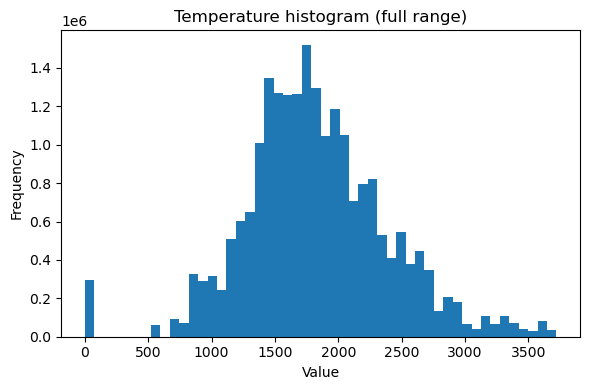

In [16]:
# Draw the histogram of Rainfall Data
plot_histogram(rainfall_data, "Temperature histogram (full range)")

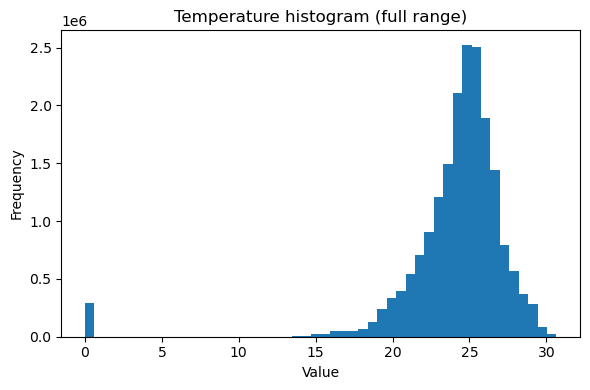

In [17]:
# Draw the histogram of Temperature Data
plot_histogram(temp_data, "Temperature histogram (full range)")

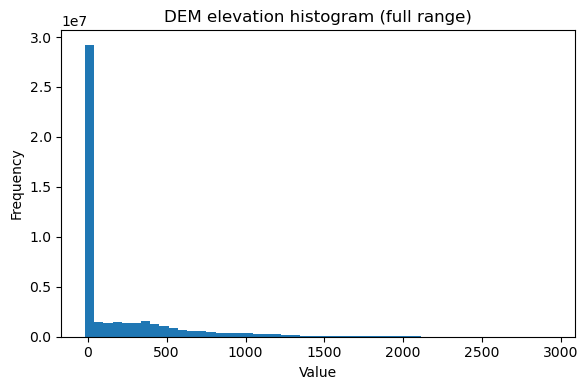

In [18]:
# Draw the histogram of DEM_data
plot_histogram(dem_data, "DEM elevation histogram (full range)")

### Summary
- Check EPSG / CRS
    - Each layer (farms, DEM, rainfall, temperature, landcover, etc.) has a CRS / EPSG code that tells QGIS/Python how to place it on the earth (e.g. `EPSG:4326`, `EPSG:3857`).
    - In our project, some datasets are in 4326 and some are in 3857, but we compute environmental factors (rainfall, temperature, elevation, etc.) from rasters that are in EPSG:3857.
    - If the farm layer is still in a different CRS and you don’t reproject it:
        - Polygons will not line up with the rasters.
        - Zonal stats (mean rainfall, temperature, etc. per farm) will be wrong

- Checking `nodata`

    - Raster files use a special value (e.g. `0` or `-9999`) to mark missing pixels, which are the nodata value
    - In our case `nodata` is reported as `None`, so we cannot assume that `0` is nodata. We first need to check the data distribution (e.g. with a histogram) to see whether `0` is actually used as a real measurement or only as a missing-data flag.
    
    --> `0` is actually used as a real measurement based on histogram

# Calculate the environmental factors in each farm

### Add Uniques Farm ID

In [19]:
# Reproject farms to match the CRS of raster data (EPSG:3857)
farms_reprojected = farms.to_crs(epsg=3857)

print(f"Original farms CRS: {farms.crs}")
print(f"Reprojected farms CRS: {farms_reprojected.crs}")

Original farms CRS: EPSG:4326
Reprojected farms CRS: EPSG:3857


In [20]:
# Reset index to create a unique Farm ID column
farms_reprojected = farms_reprojected.reset_index()
farms_reprojected = farms_reprojected.rename(columns={"index": "Farm ID"})

### Add Latitude and Longitude to Each Farm

In [21]:
# Calculate the centroid of each farm's geometry
farms_reprojected["centroid_geometry"] = farms_reprojected.geometry.centroid

# Reproject the centroid geometries to EPSG:4326 to get latitude and longitude
centroids_latlon = farms_reprojected["centroid_geometry"].to_crs(epsg=4326)

# Extract latitude and longitude
farms_reprojected["longitude"] = centroids_latlon.x
farms_reprojected["latitude"] = centroids_latlon.y

# Drop farmer name
farms_reprojected.drop(columns=["Name"], inplace=True)

# Print first few row
farms_reprojected.head(5)

,Farm ID,Suco,Aldeia,treeo2_id,plant_year,Subdistrict,layer,geometry,centroid_geometry,longitude,latitude
0,0,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101512.97 -957413.083 0, 1...",POINT (14101474.833 -957449.978),126.675704,-8.568798
1,1,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101967.821 -957269.166 0, ...",POINT (14101969.684 -957312.645),126.680149,-8.567578
2,2,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100209.583 -965731.093 0, ...",POINT (14100244.434 -965720.771),126.664651,-8.642259
3,3,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14098786.13 -965389.142 0, 1...",POINT (14098775.799 -965431.476),126.651458,-8.639690
4,4,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100819.288 -965879.974 0, ...",POINT (14100849.227 -965804.365),126.670084,-8.643001


### Calculate the area hectare in each farm


In [22]:
# Convert from m2 to hectare
farms_reprojected["area_ha"] = farms_reprojected.geometry.area / 10000

# Display first few row
farms_reprojected.head(5)

,Farm ID,Suco,Aldeia,treeo2_id,plant_year,Subdistrict,layer,geometry,centroid_geometry,longitude,latitude,area_ha
0,0,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101512.97 -957413.083 0, 1...",POINT (14101474.833 -957449.978),126.675704,-8.568798,0.369033
1,1,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101967.821 -957269.166 0, ...",POINT (14101969.684 -957312.645),126.680149,-8.567578,0.493987
2,2,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100209.583 -965731.093 0, ...",POINT (14100244.434 -965720.771),126.664651,-8.642259,1.215683
3,3,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14098786.13 -965389.142 0, 1...",POINT (14098775.799 -965431.476),126.651458,-8.639690,0.468802
4,4,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100819.288 -965879.974 0, ...",POINT (14100849.227 -965804.365),126.670084,-8.643001,2.047884


### Calculate Average Temperature and Rainfall per Farm

In [23]:
# Implement the transformation raster files for zonal statistic
temp_transform = src_temp.transform
rainfall_transform = src_rainfall.transform


# Calculate zonal statistics for temperature
temp_stats = zonal_stats(
    farms_reprojected.geometry,
    temp_data,
    affine=temp_transform,
    stats=["mean"],
    nodata=0,
    all_touched=True,
    geojson_out=False,
)

# Extract mean temperature
farms_reprojected["temperature"] = [s["mean"] for s in temp_stats]

In [24]:
# Calculate zonal statistics for rainfall
rainfall_stats = zonal_stats(
    farms_reprojected.geometry,
    rainfall_data,
    affine=rainfall_transform,
    stats=["mean"],
    nodata=0,
    all_touched=True,
    geojson_out=False,
)

# Extract mean rainfall
farms_reprojected["rainfall"] = [s["mean"] for s in rainfall_stats]

In [25]:
# Display the first few rows with the new columns
farms_reprojected.head(5)

,Farm ID,Suco,Aldeia,treeo2_id,plant_year,Subdistrict,layer,geometry,centroid_geometry,longitude,latitude,area_ha,temperature,rainfall
0,0,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101512.97 -957413.083 0, 1...",POINT (14101474.833 -957449.978),126.675704,-8.568798,0.369033,23.731438,1958.552587
1,1,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101967.821 -957269.166 0, ...",POINT (14101969.684 -957312.645),126.680149,-8.567578,0.493987,23.771669,1958.552587
2,2,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100209.583 -965731.093 0, ...",POINT (14100244.434 -965720.771),126.664651,-8.642259,1.215683,25.251092,2020.840843
3,3,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14098786.13 -965389.142 0, 1...",POINT (14098775.799 -965431.476),126.651458,-8.639690,0.468802,24.082194,2553.609375
4,4,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100819.288 -965879.974 0, ...",POINT (14100849.227 -965804.365),126.670084,-8.643001,2.047884,25.251092,2020.840843


In [26]:
farms_reprojected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Farm ID            3195 non-null   int64   
 1   Suco               2216 non-null   object  
 2   Aldeia             1893 non-null   object  
 3   treeo2_id          1859 non-null   float64 
 4   plant_year         1272 non-null   float64 
 5   Subdistrict        323 non-null    object  
 6   layer              3195 non-null   object  
 7   geometry           3195 non-null   geometry
 8   centroid_geometry  3195 non-null   geometry
 9   longitude          3195 non-null   float64 
 10  latitude           3195 non-null   float64 
 11  area_ha            3195 non-null   float64 
 12  temperature        3186 non-null   float64 
 13  rainfall           3195 non-null   float64 
dtypes: float64(7), geometry(2), int64(1), object(4)
memory usage: 349.6+ KB


### Calculate Texture, and pH per Farm

In [27]:
# Reproject soil data to match farms_reprojected CRS (EPSG:3857)
soil_complex_reprojected = soil_complex.to_crs(farms_reprojected.crs)
soil_texture_reprojected = soil_texture.to_crs(farms_reprojected.crs)
soil_ph_reprojected = soil_ph.to_crs(farms_reprojected.crs)

print(f"Soil complexity CRS: {soil_complex_reprojected.crs}")
print(f"Soil texture CRS: {soil_texture_reprojected.crs}")
print(f"Soil pH CRS: {soil_ph_reprojected.crs}")

Soil complexity CRS: EPSG:3857
Soil texture CRS: EPSG:3857
Soil pH CRS: EPSG:3857


In [28]:
# Spatial join for Soil Texture
farms_with_soil_texture = gpd.sjoin(
    farms_reprojected, soil_texture_reprojected, how="left", predicate="intersects"
)

# Group by original farm index and aggregate unique soil textures
farm_soil_texture_agg = (
    farms_with_soil_texture.groupby(farms_with_soil_texture.index)["texture"]
    .apply(lambda x: list(x.unique()))
    .rename("soil_textures")
)

# Merge back to the main farms_reprojected GeoDataFrame
farms_reprojected = farms_reprojected.merge(
    farm_soil_texture_agg, left_index=True, right_index=True, how="left"
)

In [29]:
# Spatial join for Soil pH
farms_with_soil_ph = gpd.sjoin(
    farms_reprojected, soil_ph_reprojected, how="left", predicate="intersects"
)

# Group by original farm index and aggregate unique pH values
# Handle potential non-numeric pH values if any by converting to numeric and then aggregating
farm_soil_ph_agg = (
    farms_with_soil_ph.groupby(farms_with_soil_ph.index)["ph"]
    .apply(lambda x: list(x.unique()))
    .rename("soil_ph_values")
)

# Merge back to the main farms_reprojected GeoDataFrame
farms_reprojected = farms_reprojected.merge(
    farm_soil_ph_agg, left_index=True, right_index=True, how="left"
)

In [30]:
# Display first few row
farms_reprojected.head(5)

,Farm ID,Suco,Aldeia,treeo2_id,plant_year,Subdistrict,layer,geometry,centroid_geometry,longitude,latitude,area_ha,temperature,rainfall,soil_textures,soil_ph_values
0,0,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101512.97 -957413.083 0, 1...",POINT (14101474.833 -957449.978),126.675704,-8.568798,0.369033,23.731438,1958.552587,[Clay],[6.2]
1,1,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101967.821 -957269.166 0, ...",POINT (14101969.684 -957312.645),126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",[6.2]
2,2,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100209.583 -965731.093 0, ...",POINT (14100244.434 -965720.771),126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],[8.2]
3,3,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14098786.13 -965389.142 0, 1...",POINT (14098775.799 -965431.476),126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],[5.9]
4,4,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100819.288 -965879.974 0, ...",POINT (14100849.227 -965804.365),126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],[7.0]


In [31]:
farms_reprojected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Farm ID            3195 non-null   int64   
 1   Suco               2216 non-null   object  
 2   Aldeia             1893 non-null   object  
 3   treeo2_id          1859 non-null   float64 
 4   plant_year         1272 non-null   float64 
 5   Subdistrict        323 non-null    object  
 6   layer              3195 non-null   object  
 7   geometry           3195 non-null   geometry
 8   centroid_geometry  3195 non-null   geometry
 9   longitude          3195 non-null   float64 
 10  latitude           3195 non-null   float64 
 11  area_ha            3195 non-null   float64 
 12  temperature        3186 non-null   float64 
 13  rainfall           3195 non-null   float64 
 14  soil_textures      3195 non-null   object  
 15  soil_ph_values     3195 non-null   object  
dty

### Calculate Mean Elevation and Slope per Farm

In [32]:
# Implement the transformation raster files for zonal statistic
dem_transform = src_dem.transform
dem_res_x = dem_transform.a
dem_res_y = abs(dem_transform.e)

# Calculate zonal statistics for mean elevation
dem_stats = zonal_stats(
    farms_reprojected.geometry,
    dem_data,
    affine=dem_transform,
    stats=["mean"],
    nodata=0,
    all_touched=True,
    geojson_out=False,
)

# Extract mean elevation
farms_reprojected["elevation"] = [s["mean"] for s in dem_stats]

In [33]:
# Calculate slope raster from DEM data
# Convert dem_data to float for gradient calculation to avoid integer overflow
dem_float = dem_data.astype(float)

# Compute gradient in x and y directions
dx, dy = np.gradient(dem_float, dem_res_x, dem_res_y)

# Calculate slope in radians and then convert to degrees
slope_radians = np.arctan(np.sqrt(dx**2 + dy**2))
slope_degrees = np.degrees(slope_radians)


# Calculate zonal statistics for mean slope
slope_stats = zonal_stats(
    farms_reprojected.geometry,
    slope_degrees,
    affine=dem_transform,
    stats=["mean"],
    nodata=0,
    all_touched=True,
    geojson_out=False,
)

# Extract mean slope
farms_reprojected["slope"] = [s["mean"] for s in slope_stats]

In [34]:
# Display the first few rows
farms_reprojected.head()

,Farm ID,Suco,Aldeia,treeo2_id,plant_year,Subdistrict,layer,geometry,centroid_geometry,longitude,latitude,area_ha,temperature,rainfall,soil_textures,soil_ph_values,elevation,slope
0,0,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101512.97 -957413.083 0, 1...",POINT (14101474.833 -957449.978),126.675704,-8.568798,0.369033,23.731438,1958.552587,[Clay],[6.2],585.083333,13.114323
1,1,Lavateri,Onortibalari,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14101967.821 -957269.166 0, ...",POINT (14101969.684 -957312.645),126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",[6.2],480.636364,13.937272
2,2,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100209.583 -965731.093 0, ...",POINT (14100244.434 -965720.771),126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],[8.2],177.565217,11.151526
3,3,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14098786.13 -965389.142 0, 1...",POINT (14098775.799 -965431.476),126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],[5.9],259.538462,15.552424
4,4,Alaua-Craik,Neolidae,NaN,NaN,None,Baguia_farms_original,"MULTIPOLYGON Z (((14100819.288 -965879.974 0, ...",POINT (14100849.227 -965804.365),126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],[7.0],131.175000,7.615144


In [35]:
# Check data information
farms_reprojected.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Farm ID            3195 non-null   int64   
 1   Suco               2216 non-null   object  
 2   Aldeia             1893 non-null   object  
 3   treeo2_id          1859 non-null   float64 
 4   plant_year         1272 non-null   float64 
 5   Subdistrict        323 non-null    object  
 6   layer              3195 non-null   object  
 7   geometry           3195 non-null   geometry
 8   centroid_geometry  3195 non-null   geometry
 9   longitude          3195 non-null   float64 
 10  latitude           3195 non-null   float64 
 11  area_ha            3195 non-null   float64 
 12  temperature        3186 non-null   float64 
 13  rainfall           3195 non-null   float64 
 14  soil_textures      3195 non-null   object  
 15  soil_ph_values     3195 non-null   object  
 16

In [36]:
# Drop unecessay columns
farms_reprojected.drop(
    columns=[
        "Suco",
        "Aldeia",
        "layer",
        "geometry",
        "centroid_geometry",
        "treeo2_id",
        "plant_year",
        "Subdistrict",
        "geometry",
        "centroid_geometry",
    ],
    inplace=True,
)

# Print the first few row
farms_reprojected.head()

,Farm ID,longitude,latitude,area_ha,temperature,rainfall,soil_textures,soil_ph_values,elevation,slope
0,0,126.675704,-8.568798,0.369033,23.731438,1958.552587,[Clay],[6.2],585.083333,13.114323
1,1,126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",[6.2],480.636364,13.937272
2,2,126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],[8.2],177.565217,11.151526
3,3,126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],[5.9],259.538462,15.552424
4,4,126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],[7.0],131.175000,7.615144


### Join the farm_reporjected and distance_coast

In [37]:
# Rename the column name from fid to Farm ID
distance_coast.rename(columns={"fid": "Farm ID"}, inplace=True)

# Join two dataset file on Farm ID
farms_reprojected = pd.merge(
    farms_reprojected, distance_coast[["Farm ID", "HubDist"]], on="Farm ID"
)

# Rename the column name from HubDist to distance_to_coast
farms_reprojected.rename(columns={"HubDist": "distance_to_coast"}, inplace=True)

# Display some first row
farms_reprojected.head()

,Farm ID,longitude,latitude,area_ha,temperature,rainfall,soil_textures,soil_ph_values,elevation,slope,distance_to_coast
0,1,126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",[6.2],480.636364,13.937272,13.679863
1,2,126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],[8.2],177.565217,11.151526,13.708429
2,3,126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],[5.9],259.538462,15.552424,13.387161
3,4,126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],[7.0],131.175000,7.615144,13.966934
4,5,126.704911,-8.579704,0.874206,23.454622,2011.460853,[Clay],[7.0],657.333333,9.167869,13.223976


In [38]:
# Set the threshold
threshold = 30

farms_reprojected["coastal_flag"] = (
    farms_reprojected["distance_to_coast"] <= threshold
).astype(bool)

# Print the first few row
farms_reprojected.head()

,Farm ID,longitude,latitude,area_ha,temperature,rainfall,soil_textures,soil_ph_values,elevation,slope,distance_to_coast,coastal_flag
0,1,126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",[6.2],480.636364,13.937272,13.679863,True
1,2,126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],[8.2],177.565217,11.151526,13.708429,True
2,3,126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],[5.9],259.538462,15.552424,13.387161,True
3,4,126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],[7.0],131.175000,7.615144,13.966934,True
4,5,126.704911,-8.579704,0.874206,23.454622,2011.460853,[Clay],[7.0],657.333333,9.167869,13.223976,True


For this prototype, we define “coastal farms” as those within 30 km. Based on coastal morphology studies (Hedge et al., 2021), coastal processes act strongly within 5–30 km from the shoreline. Therefore, I used a 30-km buffer from the coastline to classify whether a farm is in the coastal influence zone.

# Check the data type,  change it into right data type and mapping with the right id

In [39]:
# Check data type
farms_reprojected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Farm ID            3194 non-null   int64  
 1   longitude          3194 non-null   float64
 2   latitude           3194 non-null   float64
 3   area_ha            3194 non-null   float64
 4   temperature        3185 non-null   float64
 5   rainfall           3194 non-null   float64
 6   soil_textures      3194 non-null   object 
 7   soil_ph_values     3194 non-null   object 
 8   elevation          3194 non-null   float64
 9   slope              3194 non-null   float64
 10  distance_to_coast  3194 non-null   float64
 11  coastal_flag       3194 non-null   bool   
dtypes: bool(1), float64(8), int64(1), object(2)
memory usage: 277.7+ KB


- Transform the data type of soil ph

In [40]:
# Create function to extract the value from the list
def first_or_none(v):
    if isinstance(v, list) and len(v) > 0:
        return v[0]
    return None


# Convert it to float data
farms_reprojected["soil_ph"] = (
    farms_reprojected["soil_ph_values"].apply(first_or_none).astype(float)
)

# Drop unecessary columns
farms_reprojected.drop(columns=["soil_ph_values"], inplace=True)

# Display first few row
farms_reprojected.head()

,Farm ID,longitude,latitude,area_ha,temperature,rainfall,soil_textures,elevation,slope,distance_to_coast,coastal_flag,soil_ph
0,1,126.680149,-8.567578,0.493987,23.771669,1958.552587,"[Clay, Clay Loam]",480.636364,13.937272,13.679863,True,6.2
1,2,126.664651,-8.642259,1.215683,25.251092,2020.840843,[Sandy Loam],177.565217,11.151526,13.708429,True,8.2
2,3,126.651458,-8.639690,0.468802,24.082194,2553.609375,[Sandy Loam],259.538462,15.552424,13.387161,True,5.9
3,4,126.670084,-8.643001,2.047884,25.251092,2020.840843,[Clay],131.175000,7.615144,13.966934,True,7.0
4,5,126.704911,-8.579704,0.874206,23.454622,2011.460853,[Clay],657.333333,9.167869,13.223976,True,7.0


- Mapping soil_texture

In [41]:
# Create a texture map
texture_map = {
    "sand": 1,
    "loamy sand": 2,
    "sandy loam": 3,
    "loam": 4,
    "silty loam": 5,
    "silt": 6,
    "sandy clay loam": 7,
    "clay loam": 8,
    "silty clay loam": 9,
    "sandy clay": 10,
    "silty clay": 11,
    "clay": 12,
}

In [42]:
# Create function to extract the soil texture from list
def first_or_none(v):
    # Ensure the input is always treated as a list
    v = v if isinstance(v, list) else [v]

    # Normalize values (strip + lowercase) and remove "organic" and "variable"
    cleaned = [
        str(x).strip().lower()
        for x in v
        if str(x).strip() and str(x).strip().lower() not in ("organic", "variable")
    ]

    # Return the first remaining value; return None if the list is empty
    return cleaned[0] if cleaned else None


# Create a new column where each entry contains a single cleaned soil texture (no lists)
farms_reprojected["soil_textures"] = farms_reprojected["soil_textures"].apply(
    first_or_none
)

In [43]:
# Convert list into string
farms_reprojected["soil_textures"] = (
    farms_reprojected["soil_textures"].astype(str).str.strip().str.lower()
)

# Create a column to represent soil_texture_id
farms_reprojected["soil_texture_id"] = (
    farms_reprojected["soil_textures"].map(texture_map).astype("Int64")
)

In [44]:
farms_reprojected.head()

,Farm ID,longitude,latitude,area_ha,temperature,rainfall,soil_textures,elevation,slope,distance_to_coast,coastal_flag,soil_ph,soil_texture_id
0,1,126.680149,-8.567578,0.493987,23.771669,1958.552587,clay,480.636364,13.937272,13.679863,True,6.2,12
1,2,126.664651,-8.642259,1.215683,25.251092,2020.840843,sandy loam,177.565217,11.151526,13.708429,True,8.2,3
2,3,126.651458,-8.639690,0.468802,24.082194,2553.609375,sandy loam,259.538462,15.552424,13.387161,True,5.9,3
3,4,126.670084,-8.643001,2.047884,25.251092,2020.840843,clay,131.175000,7.615144,13.966934,True,7.0,12
4,5,126.704911,-8.579704,0.874206,23.454622,2011.460853,clay,657.333333,9.167869,13.223976,True,7.0,12


- Transform rainfall, temperature, elevation into integer type

In [53]:
cols = ["rainfall", "temperature", "elevation"]

farms_reprojected[cols] = farms_reprojected[cols].round(0).astype("Int64")

- Check data type to ensure it match data dictionary

In [54]:
# Check data types
farms_reprojected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Farm ID            3194 non-null   int64  
 1   longitude          3194 non-null   float64
 2   latitude           3194 non-null   float64
 3   area_ha            3194 non-null   float64
 4   temperature        3185 non-null   Int64  
 5   rainfall           3194 non-null   Int64  
 6   soil_textures      3194 non-null   object 
 7   elevation          3194 non-null   Int64  
 8   slope              3194 non-null   float64
 9   distance_to_coast  3194 non-null   float64
 10  coastal_flag       3194 non-null   bool   
 11  soil_ph            3147 non-null   float64
 12  soil_texture_id    3096 non-null   Int64  
dtypes: Int64(4), bool(1), float64(6), int64(1), object(1)
memory usage: 315.2+ KB


In [55]:
# Print the data description
print("\nDescriptive Statistics:")
farms_reprojected.describe()


Descriptive Statistics:


,Farm ID,longitude,latitude,area_ha,temperature,rainfall,elevation,slope,distance_to_coast,soil_ph,soil_texture_id
count,3194.000000,3194.000000,3194.000000,3194.000000,3185.0,3194.0,3194.0,3194.000000,3194.000000,3147.00000,3096.0
mean,1597.500000,126.082687,-8.716050,1.450739,24.190267,1807.718848,511.310269,10.989627,9.159638,6.99374,7.622416
std,922.172706,0.702432,0.267085,3.056633,1.455873,347.762256,264.219917,6.705400,5.661020,0.88268,3.957431
min,1.000000,124.993650,-9.405360,0.003621,19.0,865.0,4.0,0.954841,0.083622,5.60000,3.0
25%,799.250000,125.325814,-8.675973,0.400110,23.0,1529.0,349.0,5.905109,4.796254,6.20000,3.0
50%,1597.500000,126.374576,-8.634070,0.761592,24.0,1734.0,489.0,9.987906,8.346932,7.00000,8.0
75%,2395.750000,126.649795,-8.567461,1.449932,25.0,2034.0,712.0,14.919388,12.962162,7.90000,12.0
max,3194.000000,127.158910,-8.412837,88.085250,28.0,2624.0,1318.0,37.334882,24.738474,8.50000,12.0


In [56]:
# Rename the columns
farms_reprojected = farms_reprojected.rename(
    columns={
        "Farm ID": "id",
        "longitude": "lon",
        "latitude": "lat",
        "temperature": "temperature_celsius",
        "rainfall": "rainfall_mm",
        "soil_textures": "soil_texture_list",
        "elevation": "elevation_m",
        "distance_to_coast": "dist_to_coast_km",
        "coastal_flag": "coastal",
        "soil_ph": "ph",
    }
)

In [57]:
farms_reprojected.to_csv("all_farm_environmental_factors.csv", index=False)

# References

Hegde, V. S., Krishnaprasad, P. A., Shalini, G., & Rajawat, A. S. (2021). Granulometric dynamics of the coastal sediments of the Central West coast of India: Insight into morpho-tectonic influences on the beach processes. Catena, 204, 105363.